In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
plt.ion()

In [3]:
mpl.is_interactive()

True

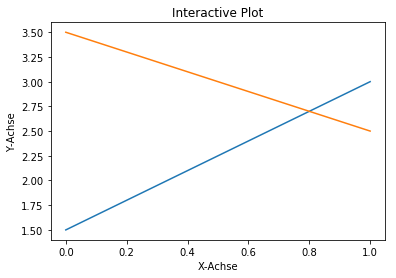

In [4]:
plt.plot([1.5, 3.0])
plt.title("Interactive Plot")
plt.xlabel("X-Achse")
plt.ylabel("Y-Achse")
plt.plot([3.5, 2.5])

# Reading from files
Von DAteien lesen, entweder python list, numpy array oder panda

In [5]:
# imort matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
txt = np.loadtxt('text.txt', delimiter = ',')
txt

array([ 1.,  1.,  2.,  4.,  3.,  9.,  4., 16.,  5., 25.])

In [7]:
txt = txt.reshape(5,2)
txt

array([[ 1.,  1.],
       [ 2.,  4.],
       [ 3.,  9.],
       [ 4., 16.],
       [ 5., 25.]])

In [8]:
x = txt[:,0]
y = txt[:,1]
print(x, y)

[1. 2. 3. 4. 5.] [ 1.  4.  9. 16. 25.]


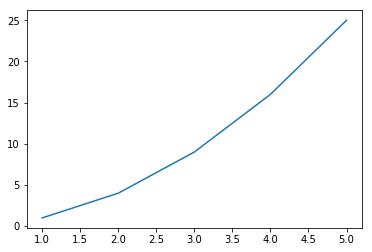

In [9]:
plt.plot(x, y)

## Reading from cvs
Einlesen von einem `*.csv` File

In [10]:
ls

 Datenträger in Laufwerk C: ist Windows
 Volumeseriennummer: 40ED-FB3B

 Verzeichnis von C:\Users\paye5393\temperature\temperature\matplotlib

26.06.2019  08:53    <DIR>          .
26.06.2019  08:53    <DIR>          ..
26.06.2019  08:53    <DIR>          .ipynb_checkpoints
26.06.2019  08:49    <SYMLINK>      GOOG.csv [Matplotlib-3.0-Cookbook\Chapter02\GOOG.csv]
26.06.2019  08:49           116.453 matplotlib.ipynb
26.06.2019  08:49    <DIR>          Matplotlib-3.0-Cookbook
26.06.2019  08:49    <SYMLINK>      temp.db [C:\home\hans\raspi_projects\temperature\flask_local\temp.db]
26.06.2019  08:49    <SYMLINK>      temp_bude.db [C:\home\hans\raspi_projects\temperature\flask_local\temp_bude.db]
26.06.2019  08:49                 0 text
26.06.2019  08:49                37 text.csv
26.06.2019  08:49                33 text.txt
               7 Datei(en),        116.523 Bytes
               4 Verzeichnis(se), 298.619.101.184 Bytes frei


[1. 2. 3. 4. 5.]
[ 1.  4.  9. 16. 25.]


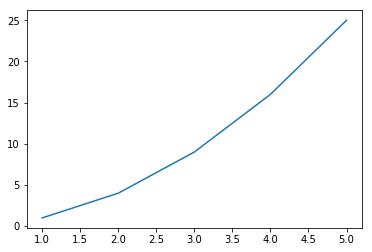

In [11]:
x, y = np.loadtxt('text.csv', unpack=True, usecols=(0,1), delimiter=',')
print(x)
print(y)
plt.plot(x,y)

# LinePlot

In [18]:
# load the google Stock Price File
#stock =  pd.read_csv('GOOG.csv', header=None, delimiter=',')
#add column names
#stock.columns = ['date', 'price']
#stock['date'] = pd.to_datetime(stock['date'], format='%d-%m-%Y')
#indexed_stock = stock.set_index('date')
#ts = indexed_stock['price']
#plt.plot(ts)

#  Convert `sqlite.db` into panda
an sqlite query result can be easyly and directly stored in an panda dataframe

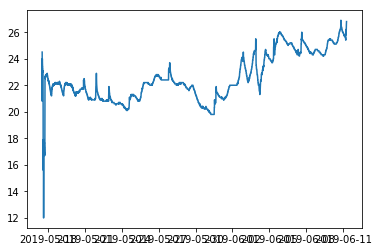

In [15]:
import sqlite3

# connect to sqlite database
conn = sqlite3.connect('../flask_local/temp.db')
query = "SELECT temp, sqltime FROM sensor_data"

# insert into dataframe
df = pd.read_sql_query(query,conn)

#define colums
df.columns = ['temp', 'sqltime']
#set column sqltime to panda datetimeformat
df['sqltime'] = pd.to_datetime(df['sqltime'], format="%Y-%m-%d %H:%M:%S")
# create indexed panda
indexed_df = df.set_index('sqltime')
ts = indexed_df['temp']

#plot it
plt.plot(ts)

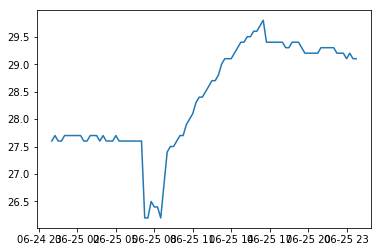

In [16]:
import sqlite3
from datetime import datetime, date, time, timedelta

now = date.today()
now_str = now.strftime("%Y-%m-%d")
yesterday = now-timedelta(days=1)
yesterday_str = yesterday.strftime("%Y-%m-%d")

# connect to sqlite database
conn = sqlite3.connect('../flask_local/temp_bude.db')
query = "SELECT temp, sqltime FROM sensor_data where sqltime between '{}' and '{}'".format(yesterday_str, now_str)

# insert into dataframe
df = pd.read_sql_query(query,conn)

#define colums
df.columns = ['temp', 'sqltime']
#set column sqltime to panda datetimeformat
df['sqltime'] = pd.to_datetime(df['sqltime'], format="%Y-%m-%d %H:%M:%S")
# create indexed panda
indexed_df = df.set_index('sqltime')
ts = indexed_df['temp']

#plot it
plt.plot(ts)

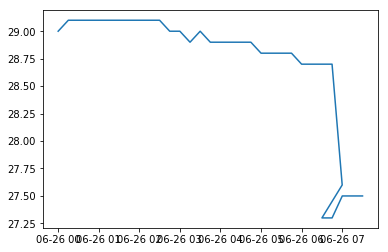

In [17]:
import sqlite3
from datetime import datetime, date, time

now = date.today()
now_str = now.strftime("%Y-%m-%d")

# connect to sqlite database
conn = sqlite3.connect('../flask_local/temp_bude.db')
query = "SELECT temp, sqltime FROM sensor_data where sqltime > '{}'".format(now_str)

# insert into dataframe
df = pd.read_sql_query(query,conn)

#define colums
df.columns = ['temp', 'sqltime']
#set column sqltime to panda datetimeformat
df['sqltime'] = pd.to_datetime(df['sqltime'], format="%Y-%m-%d %H:%M:%S")
# create indexed panda
indexed_df = df.set_index('sqltime')
ts = indexed_df['temp']

#plot it
plt.plot(ts)

In [ ]:
from datetime import datetime, date, time, timedelta
print(datetime.now())
print(date.today())
now = date.today()
now.strftime("%Y-%m-%d")
yesterday = now - timedelta(days=1)
yesterday.strftime("%Y-%m-%d")